In [4]:
import pandas as pd
import reviews_explore as e
import reviews_exp_vis as v

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
ny = pd.read_csv("ny_reviews_sentiment.csv")
ny.head()

,camis,dba,boro,phone,inspection_date,latitude,longitude,cuisine_description,action,score,grade,full_address,violation_code,violation_description,last_inspection_date,reviews,neg,neu,pos,compound
0,40364439,SEVILLA RESTAURANT,Manhattan,2129293189,2021-08-04,40.734908,-74.002973,Latin American,Violations cited,27,B,62 CHARLES STREET 10014,10B 04L 02H 04H 08A,Plumbing not properly installed or maintained;...,2020-08-04,horrible food slow service seafood paella tast...,0.084,0.673,0.244,0.9975
1,40364439,SEVILLA RESTAURANT,Manhattan,2129293189,2022-05-18,40.734908,-74.002973,Latin American,Violations cited,19,B,62 CHARLES STREET 10014,04L 08C 06C 08A,Evidence of mice or live mice present in facil...,2021-08-04,superb havent good paella since moving back ny...,0.041,0.630,0.330,0.9998
2,40364439,SEVILLA RESTAURANT,Manhattan,2129293189,2023-05-17,40.734908,-74.002973,Latin American,Violations cited,12,A,62 CHARLES STREET 10014,10B 04L 08A,Anti-siphonage or back-flow prevention device ...,2022-05-18,gem ocano nyc spanish dish old school spanish ...,0.055,0.581,0.365,1.0000
3,40365904,MEE SUM CAFE,Manhattan,2123495260,2021-10-13,40.714861,-73.998200,Coffee/Tea,Violations cited,67,C,26 PELL STREET 10013,02G 04A 08A 06C 02B 04N 05D 10B 10F 09C 06F,Cold food item held above 41º F (smoked fish a...,2020-10-13,authentic place point needed lot help managed ...,0.060,0.688,0.252,0.7717
4,40365904,MEE SUM CAFE,Manhattan,2123495260,2021-11-24,40.714861,-73.998200,Coffee/Tea,Violations cited,24,B,26 PELL STREET 10013,10F 02G 02B 06C 10B,Non-food contact surface improperly constructe...,2021-10-13,really great classic chinese comfort food grea...,0.000,0.537,0.463,0.9468


In [6]:
# Create a new column 'unique_words' in the DataFrame

ny['reviews_unique'] = ny['reviews'].apply(lambda review: ' '.join(set(review.split())))

In [7]:
ny.head()

,camis,dba,boro,phone,inspection_date,latitude,longitude,cuisine_description,action,score,...,full_address,violation_code,violation_description,last_inspection_date,reviews,neg,neu,pos,compound,reviews_unique
0,40364439,SEVILLA RESTAURANT,Manhattan,2129293189,2021-08-04,40.734908,-74.002973,Latin American,Violations cited,27,...,62 CHARLES STREET 10014,10B 04L 02H 04H 08A,Plumbing not properly installed or maintained;...,2020-08-04,horrible food slow service seafood paella tast...,0.084,0.673,0.244,0.9975,perfection eat appetizer snapper bar undrinkab...
1,40364439,SEVILLA RESTAURANT,Manhattan,2129293189,2022-05-18,40.734908,-74.002973,Latin American,Violations cited,19,...,62 CHARLES STREET 10014,04L 08C 06C 08A,Evidence of mice or live mice present in facil...,2021-08-04,superb havent good paella since moving back ny...,0.041,0.630,0.330,0.9998,advantage famous grew ask little mean forget c...
2,40364439,SEVILLA RESTAURANT,Manhattan,2129293189,2023-05-17,40.734908,-74.002973,Latin American,Violations cited,12,...,62 CHARLES STREET 10014,10B 04L 08A,Anti-siphonage or back-flow prevention device ...,2022-05-18,gem ocano nyc spanish dish old school spanish ...,0.055,0.581,0.365,1.0000,space little mean companion forget wall hold c...
3,40365904,MEE SUM CAFE,Manhattan,2123495260,2021-10-13,40.714861,-73.998200,Coffee/Tea,Violations cited,67,...,26 PELL STREET 10013,02G 04A 08A 06C 02B 04N 05D 10B 10F 09C 06F,Cold food item held above 41º F (smoked fish a...,2020-10-13,authentic place point needed lot help managed ...,0.060,0.688,0.252,0.7717,friend old quick shop coffee style go managed ...
4,40365904,MEE SUM CAFE,Manhattan,2123495260,2021-11-24,40.714861,-73.998200,Coffee/Tea,Violations cited,24,...,26 PELL STREET 10013,10F 02G 02B 06C 10B,Non-food contact surface improperly constructe...,2021-10-13,really great classic chinese comfort food grea...,0.000,0.537,0.463,0.9468,really classic old great history oldest update...


In [8]:
ny.shape

(4605, 21)

In [9]:
ny = ny[ny.reviews.notna()]
ny.shape

(4605, 21)

In [10]:
ny = ny.drop(columns=['latitude', 'longitude', 'phone', 'action', 'full_address', 'violation_code', 'violation_description'])

In [11]:
ny.grade.unique()

array(['B', 'A', 'C'], dtype=object)

In [ ]:
counts = e.counts_and_ratios(ny, "grade")
counts

,n,percent
grade,,
A,2392,0.587715
B,970,0.238329
C,708,0.173956


In [ ]:
a_reviews, b_reviews, c_reviews, all_reviews = e.join_text(ny)
a_words, b_words, c_words, all_words = e.list_words(ny)
a_freq, b_freq, c_freq, all_freq = e.word_freq(ny)

In [10]:
word_counts = e.word_counts(ny, reset_index=False)

In [15]:
word_counts.head(5)

,All,A,B,C
wa,50463,25948,13439,11076
food,36404,18234,9865,8305
good,25900,13560,6751,5589
great,22987,12039,6125,4823
place,19657,10440,5048,4169


In [16]:
word_counts['A '] = (word_counts['A'] / word_counts['All']) * 100
word_counts['B '] = (word_counts['B'] / word_counts['All']) * 100
word_counts['C '] = (word_counts['C'] / word_counts['All']) * 100
word_counts.head()

,All,A,B,C,A,B,C
wa,50463,25948,13439,11076,51.419852,26.631393,21.948755
food,36404,18234,9865,8305,50.087902,27.098670,22.813427
good,25900,13560,6751,5589,52.355212,26.065637,21.579151
great,22987,12039,6125,4823,52.373080,26.645495,20.981424
place,19657,10440,5048,4169,53.110851,25.680419,21.208730


In [51]:
word_prop_c_high = word_counts[(word_counts['C'] > 100) & ((word_counts['A '] < word_counts['C ']) | (word_counts['B '] < word_counts['C ']))]

word_prop_c_high.sort_values('C ', ascending=False).head(20)

,All,A,B,C,A,B,C
crab,439,120,112,207,27.334852,25.512528,47.152620
dumpling,1063,445,193,425,41.862653,18.156162,39.981185
crepe,349,94,116,139,26.934097,33.237822,39.828080
boba,305,127,57,121,41.639344,18.688525,39.672131
seafood,563,220,148,195,39.076377,26.287744,34.635879
noodle,1135,471,289,375,41.497797,25.462555,33.039648
ramen,455,119,191,145,26.153846,41.978022,31.868132
pie,674,338,135,201,50.148368,20.029674,29.821958
bun,444,189,123,132,42.567568,27.702703,29.729730
frozen,373,198,65,110,53.083110,17.426273,29.490617


In [52]:
word_prop_c_high = word_prop_c_high[['All','A ', 'B ', 'C ']]
word_prop_c_high.head()

,All,A,B,C
coffee,5546,59.610530,19.148936,21.240534
fried,1989,45.751634,26.596280,27.652086
tried,1906,52.570829,23.504722,23.924449
tea,1887,55.590885,19.554849,24.854266
slice,1470,51.292517,23.605442,25.102041


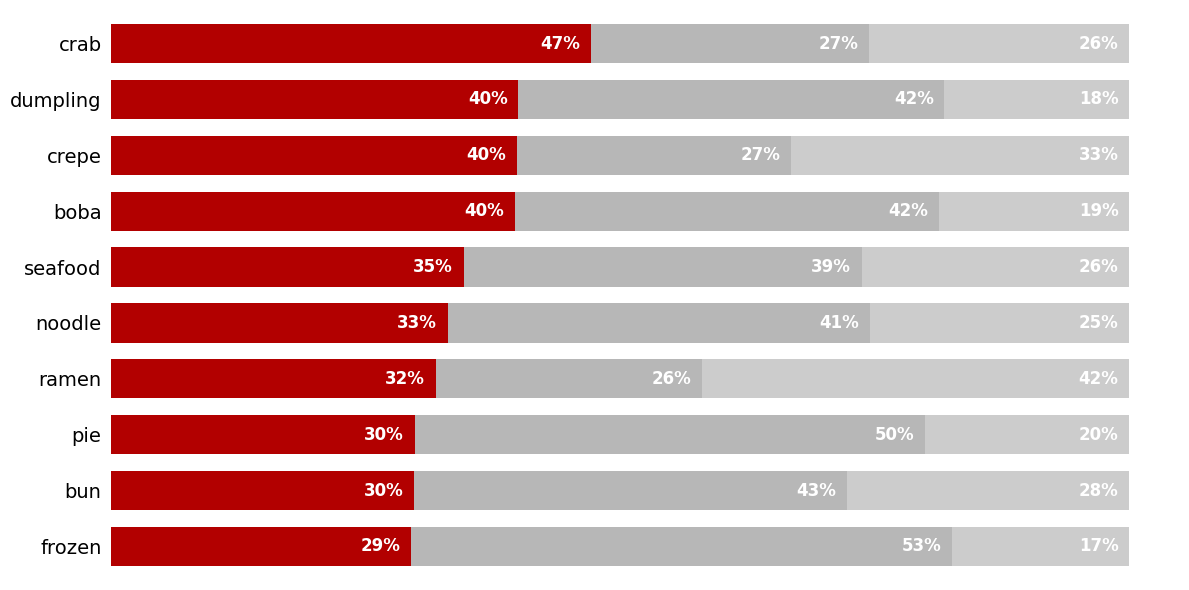

In [86]:
custom_colors = {'A ': '#B7B7B7', 'B ': '#CCCCCC', 'C ': '#B20000', 'All': 'grey'}
v.plot_top_words_freq(word_prop_c_high, column='C ', top_n=10, include_all=False, custom_colors=custom_colors, figsize=(12, 6), title='')

In [90]:
word_prop_a_high = word_counts[(word_counts['All'] > 200) & (word_counts['C '] < 17)]

word_prop_a_high = word_prop_a_high.sort_values('C ', ascending=True).head(10)
word_prop_a_high

,All,A,B,C,A,B,C
donut,680,499,160,21,73.382353,23.529412,3.088235
karaoke,208,146,55,7,70.192308,26.442308,3.365385
dunkin,260,212,39,9,81.538462,15.000000,3.461538
starbucks,334,260,47,27,77.844311,14.071856,8.083832
dog,353,237,83,33,67.138810,23.512748,9.348442
shake,250,172,53,25,68.800000,21.200000,10.000000
cookie,228,165,40,23,72.368421,17.543860,10.087719
drive,366,256,71,39,69.945355,19.398907,10.655738
shame,249,162,59,28,65.060241,23.694779,11.244980
diner,511,351,101,59,68.688845,19.765166,11.545988


In [91]:
word_prop_a_high = word_prop_a_high[['All','A ', 'B ', 'C ']]
word_prop_a_high.head(10)

,All,A,B,C
donut,680,73.382353,23.529412,3.088235
karaoke,208,70.192308,26.442308,3.365385
dunkin,260,81.538462,15.000000,3.461538
starbucks,334,77.844311,14.071856,8.083832
dog,353,67.138810,23.512748,9.348442
shake,250,68.800000,21.200000,10.000000
cookie,228,72.368421,17.543860,10.087719
drive,366,69.945355,19.398907,10.655738
shame,249,65.060241,23.694779,11.244980
diner,511,68.688845,19.765166,11.545988


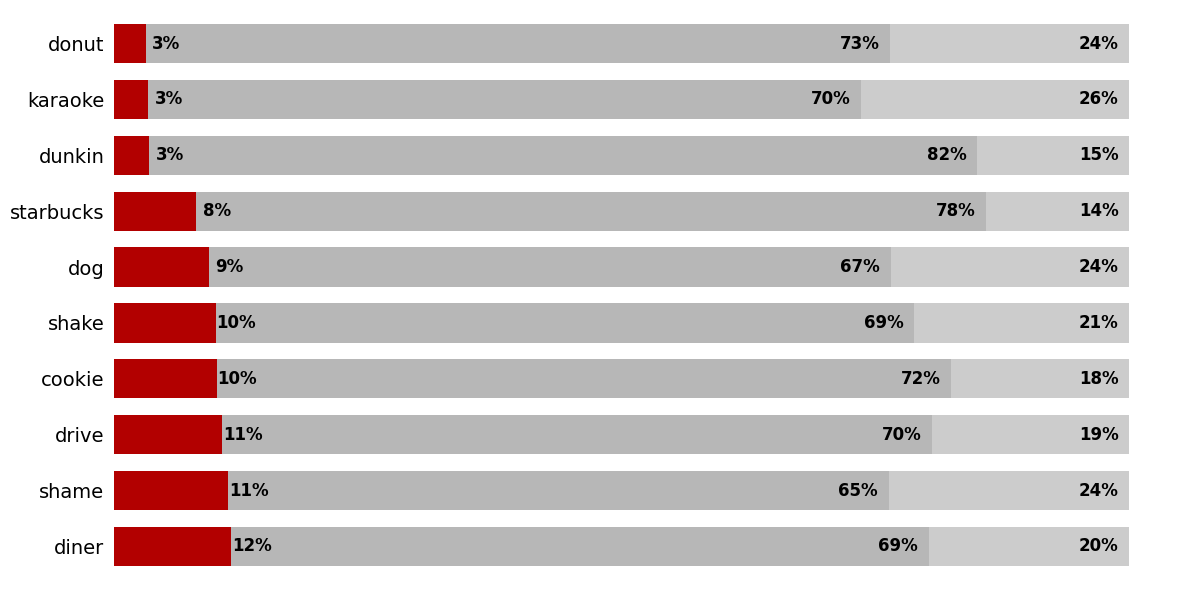

In [93]:
custom_colors = {'A ': '#B7B7B7', 'B ': '#CCCCCC', 'C ': '#B20000', 'All': 'grey'}
v.plot_top_words_freq_small(word_prop_a_high, column='C ', top_n=10, include_all=False, custom_colors=custom_colors, figsize=(12, 6), title='')

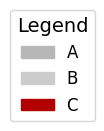

In [129]:
# Example usage:
custom_colors = {'A ': '#B7B7B7', 'B ': '#CCCCCC', 'C ': '#B20000'}
v.plot_legend_onlyv2(custom_colors, figsize=(1, 1))

In [26]:
word_prop_a_high = word_counts[(word_counts['All'] > 500)]#  & (word_counts['C '] < 17) & (word_counts['B '] < 24)]

word_prop_a_high.sort_values('A ', ascending=False).head(20)

,All,A,B,C,A,B,C
coffee,1059,681,214,164,64.305949,20.207743,15.486308
morning,521,335,98,88,64.299424,18.809981,16.890595
employee,846,531,179,136,62.765957,21.158392,16.075650
burger,558,346,120,92,62.007168,21.505376,16.487455
location,1237,759,278,200,61.358124,22.473727,16.168149
cream,567,346,111,110,61.022928,19.576720,19.400353
worker,713,433,154,126,60.729313,21.598878,17.671809
breakfast,738,448,160,130,60.704607,21.680217,17.615176
line,572,347,127,98,60.664336,22.202797,17.132867
slow,678,407,162,109,60.029499,23.893805,16.076696


In [27]:
word_prop_a_high = word_prop_a_high[['All','A ', 'B ', 'C ']]
word_prop_a_high.head()

,All,A,B,C
good,3892,57.348407,24.331963,18.319630
wa,3882,57.959815,23.982483,18.057702
food,3695,56.265223,25.060893,18.673884
place,3631,57.339576,24.648857,18.011567
great,3598,57.142857,24.596998,18.260145


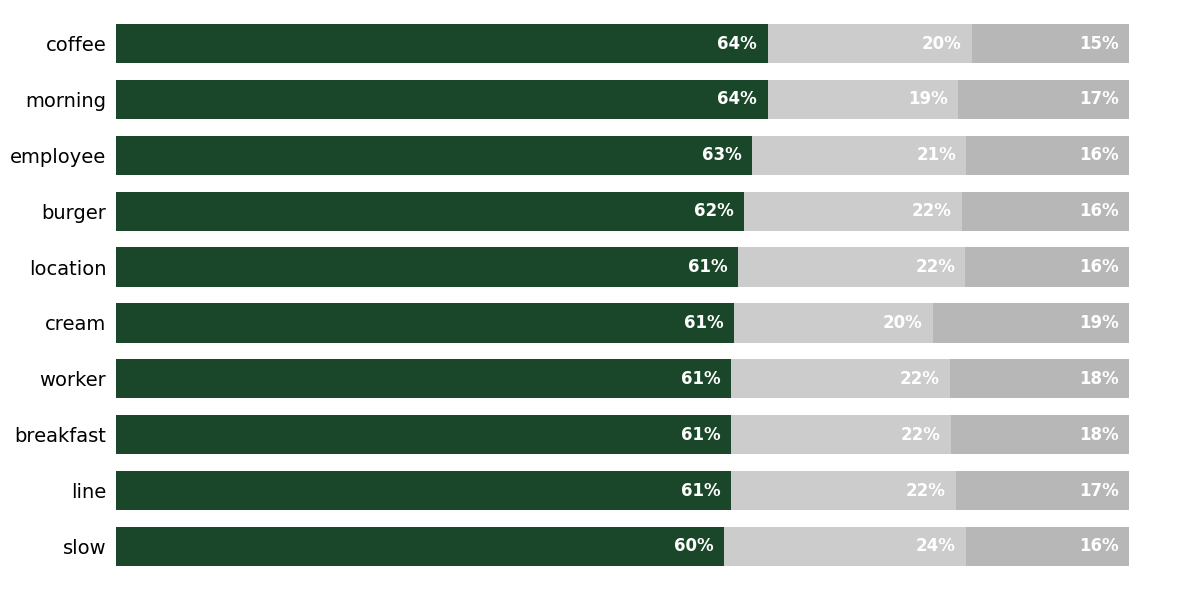

In [28]:
custom_colors = {'A ': '#1a472a', 'B ': '#CCCCCC', 'C ': '#B7B7B7', 'All': 'grey'}
v.plot_top_words_freq(word_prop_a_high, column='A ', top_n=10, include_all=False, custom_colors=custom_colors, figsize=(12, 6), title='')

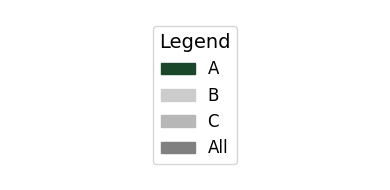

In [120]:
# Example usage:
custom_colors = {'A ': '#1a472a', 'B ': '#CCCCCC', 'C ': '#B7B7B7', 'All': 'grey'}
v.plot_legend_only(custom_colors)

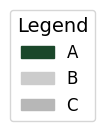

In [128]:
# Example usage:
custom_colors = {'A ': '#1a472a', 'B ': '#CCCCCC', 'C ': '#B7B7B7'}
v.plot_legend_onlyv2(custom_colors, figsize=(1, 1))

In [130]:
word_prop_b_high = word_counts[(word_counts['All'] > 200)]#  & (word_counts['C '] < 17) & (word_counts['B '] < 24)]

word_prop_b_high.sort_values('B ', ascending=False).head(20)

,All,A,B,C,A,B,C
patty,370,158,166,46,42.702703,44.864865,12.432432
japanese,416,136,182,98,32.692308,43.750000,23.557692
ramen,455,119,191,145,26.153846,41.978022,31.868132
duck,460,139,189,132,30.217391,41.086957,28.695652
homemade,321,151,122,48,47.040498,38.006231,14.953271
pot,248,101,93,54,40.725806,37.500000,21.774194
curry,924,355,338,231,38.419913,36.580087,25.000000
deli,222,103,81,38,46.396396,36.486486,17.117117
meatball,250,91,89,70,36.400000,35.600000,28.000000
pasta,1053,462,365,226,43.874644,34.662868,21.462488


In [131]:
word_prop_b_high = word_prop_b_high[['All','A ', 'B ', 'C ']]
word_prop_b_high.head()

,All,A,B,C
wa,50463,51.419852,26.631393,21.948755
food,36404,50.087902,27.098670,22.813427
good,25900,52.355212,26.065637,21.579151
great,22987,52.373080,26.645495,20.981424
place,19657,53.110851,25.680419,21.208730


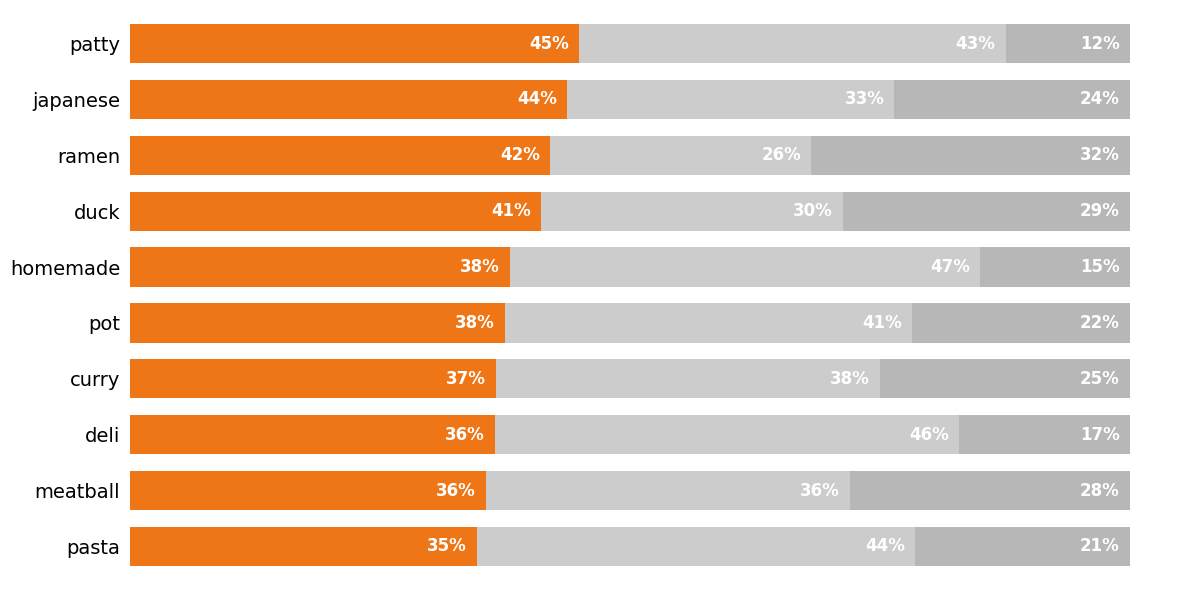

In [134]:
custom_colors = {'A ': '#CCCCCC', 'B ': '#EE7617', 'C ': '#B7B7B7', 'All': 'grey'}
v.plot_top_words_freq(word_prop_b_high, column='B ', top_n=10, include_all=False, custom_colors=custom_colors, figsize=(12, 6), title='')

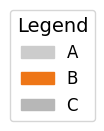

In [135]:
# Example usage:
custom_colors = {'A ': '#CCCCCC', 'B ': '#EE7617', 'C ': '#B7B7B7'}
v.plot_legend_onlyv2(custom_colors, figsize=(1, 1))

___
___
___
# Unique words

In [12]:
word_counts = e.word_counts(ny, reset_index=False, text_column='reviews_unique')

In [13]:
word_counts.head(5)

,All,A,B,C
good,3892,2232,947,713
wa,3882,2250,931,701
food,3695,2079,926,690
place,3631,2082,895,654
great,3598,2056,885,657


In [14]:
word_counts['A '] = (word_counts['A'] / word_counts['All']) * 100
word_counts['B '] = (word_counts['B'] / word_counts['All']) * 100
word_counts['C '] = (word_counts['C'] / word_counts['All']) * 100
word_counts.head()

,All,A,B,C,A,B,C
good,3892,2232,947,713,57.348407,24.331963,18.319630
wa,3882,2250,931,701,57.959815,23.982483,18.057702
food,3695,2079,926,690,56.265223,25.060893,18.673884
place,3631,2082,895,654,57.339576,24.648857,18.011567
great,3598,2056,885,657,57.142857,24.596998,18.260145


In [25]:
word_prop_c_high = word_counts[(word_counts['C'] > 100)]# & ((word_counts['A '] < word_counts['C ']) | (word_counts['B '] < word_counts['C ']))]

word_prop_c_high.sort_values('C ', ascending=False).head(20)

,All,A,B,C,A,B,C
bean,401,194,102,105,48.379052,25.436409,26.184539
cook,452,219,115,118,48.451327,25.442478,26.106195
pork,503,237,135,131,47.117296,26.838966,26.043738
1010,437,216,109,112,49.427918,24.942792,25.629291
comfortable,399,207,91,101,51.879699,22.807018,25.313283
authentic,711,339,195,177,47.679325,27.426160,24.894515
rice,1038,501,279,258,48.265896,26.878613,24.855491
kitchen,484,238,126,120,49.173554,26.033058,24.793388
100,417,210,104,103,50.359712,24.940048,24.700240
flavorful,544,266,145,133,48.897059,26.654412,24.448529


In [21]:
word_prop_c_high = word_prop_c_high[['All','A ', 'B ', 'C ']]
word_prop_c_high.head()

,All,A,B,C
good,3892,57.348407,24.331963,18.319630
wa,3882,57.959815,23.982483,18.057702
food,3695,56.265223,25.060893,18.673884
place,3631,57.339576,24.648857,18.011567
great,3598,57.142857,24.596998,18.260145


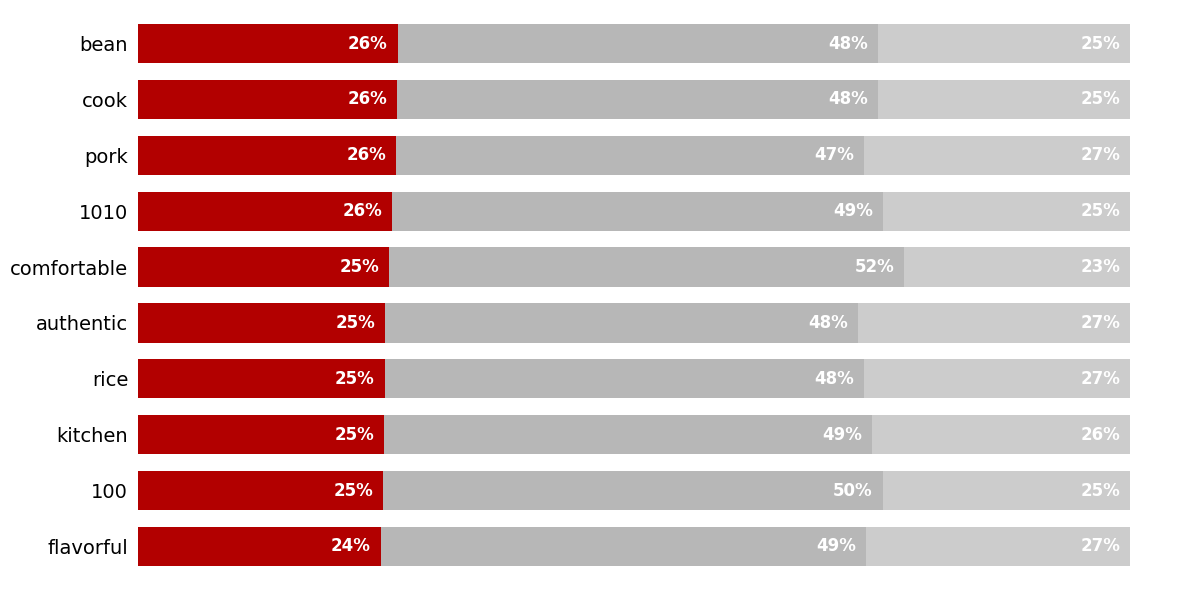

In [22]:
custom_colors = {'A ': '#B7B7B7', 'B ': '#CCCCCC', 'C ': '#B20000', 'All': 'grey'}
v.plot_top_words_freq(word_prop_c_high, column='C ', top_n=10, include_all=False, custom_colors=custom_colors, figsize=(12, 6), title='')

In [11]:
# Regex pattern for finding emojis
def extract_emojis(text):
    emoji_pattern = regex.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=regex.UNICODE)
    
    return ' '.join(emoji_pattern.findall(text))


In [12]:
import regex

In [14]:

# Apply the function to create a new column with only emojis
ny['emoji_reviews'] = ny['reviews'].apply(extract_emojis)

# Perform the split and stack to get all individual emojis
all_emojis = ny['emoji_reviews'].str.split(expand=True).stack()

# Frequency count of all emojis
all_freq = pd.Series(all_emojis).value_counts().sort_values(ascending=False).astype(int)


In [15]:
all_freq.head(20)  # Display the top emojis by frequency



😋     643
👍     547
👌     281
❤️    273
😊     187
😍     171
🤤     122
🍕     106
👏      91
👎      80
😂      79
🔥      77
💯      74
😁      68
🥰      65
😉      62
🤩      60
😀      56
☺️     54
❤      54
Name: count, dtype: int64

In [16]:
all_emojis

2     0      🇭🇰
6     0       😒
      1       👌
7     0      ❤️
8     0     👍👍👍
           ... 
4094  14     👍🏻
      15     👌🏼
      16      😂
4095  0       😂
4097  0       🥐
Length: 8435, dtype: object

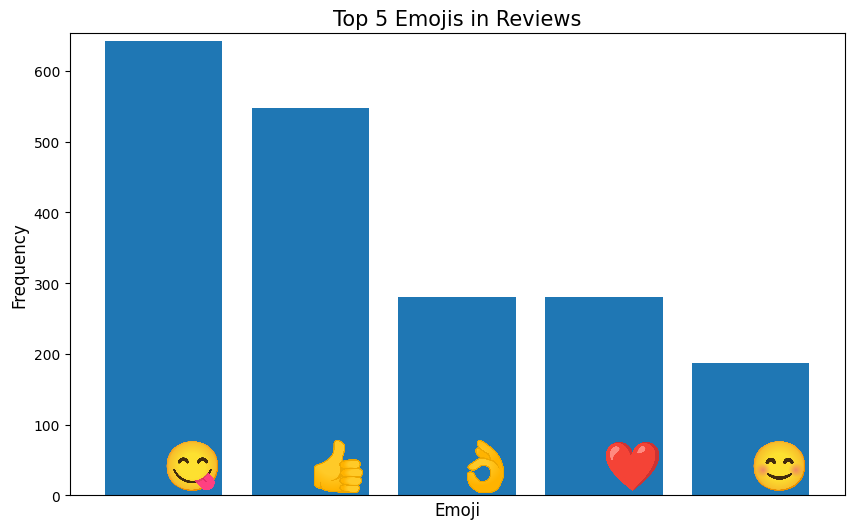

In [24]:
from imojify import imojify
from matplotlib import pyplot as plt 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Define the function to place an emoji image at given coordinates
def offset_image(coord, emoji, ax):
    img = plt.imread(imojify.get_img_path(emoji))
    im = OffsetImage(img, zoom=0.08)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0), xycoords='data', frameon=False, pad=0, box_alignment=(0.0, 0.0))
    ax.add_artist(ab)

# Your existing code to plot the data
plt.figure(figsize=(10, 6))
plt.bar(top_emojis, top_counts)

# Remove the current labels
plt.xticks([])

# Set the new emoji labels using the offset_image function
for i, emoji in enumerate(top_emojis):
    offset_image(i, emoji, plt.gca())

# Adjust the axis and padding if necessary
plt.ylim(0, max(top_counts) + 10)
plt.tick_params(axis='x', which='major', pad=15)

# Add title and labels with default font
plt.title('Top 5 Emojis in Reviews', fontsize=15)
plt.xlabel('Emoji', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()
